In [ ]:
#IMPORTING:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 17.4 MB/s eta 0:00:00


In [ ]:
#prompt: parser = PDBParser()
# structure = parser.get_structure("A180", "1A80.pdb")
# give this code with the option upload a pdb here as well
from google.colab import files
from Bio.PDB import PDBParser, PPBuilder, is_aa
!pip install biopython

In [ ]:
uploaded = files.upload()

Saving 1a80.pdb to 1a80.pdb


In [ ]:
file_name = next(iter(uploaded))

In [ ]:
parser = PDBParser()

In [ ]:
#use the correct file name including the extension
structure = parser.get_structure("uploaded_structure", file_name)

In [ ]:
#Access Chains and Residues:
for model in structure:
    for chain in model:
      print("chain ID:", chain.id)
      for residue in chain:
          print(residue.get_resname(), residue.id[1])

chain ID: A
THR 2
VAL 3
PRO 4
SER 5
ILE 6
VAL 7
LEU 8
ASN 9
ASP 10
GLY 11
ASN 12
SER 13
ILE 14
PRO 15
GLN 16
LEU 17
GLY 18
TYR 19
GLY 20
VAL 21
PHE 22
LYS 23
VAL 24
PRO 25
PRO 26
ALA 27
ASP 28
THR 29
GLN 30
ARG 31
ALA 32
VAL 33
GLU 34
GLU 35
ALA 36
LEU 37
GLU 38
VAL 39
GLY 40
TYR 41
ARG 42
HIS 43
ILE 44
ASP 45
THR 46
ALA 47
ALA 48
ILE 49
TYR 50
GLY 51
ASN 52
GLU 53
GLU 54
GLY 55
VAL 56
GLY 57
ALA 58
ALA 59
ILE 60
ALA 61
ALA 62
SER 63
GLY 64
ILE 65
ALA 66
ARG 67
ASP 68
ASP 69
LEU 70
PHE 71
ILE 72
THR 73
THR 74
LYS 75
LEU 76
TRP 77
ASN 78
ASP 79
ARG 80
HIS 81
ASP 82
GLY 83
ASP 84
GLU 85
PRO 86
ALA 87
ALA 88
ALA 89
ILE 90
ALA 91
GLU 92
SER 93
LEU 94
ALA 95
LYS 96
LEU 97
ALA 98
LEU 99
ASP 100
GLN 101
VAL 102
ASP 103
LEU 104
TYR 105
LEU 106
VAL 107
HIS 108
TRP 109
PRO 110
THR 111
PRO 112
ALA 113
ALA 114
ASP 115
ASN 116
TYR 117
VAL 118
HIS 119
ALA 120
TRP 121
GLU 122
LYS 123
MET 124
ILE 125
GLU 126
LEU 127
ARG 128
ALA 129
ALA 130
GLY 131
LEU 132
THR 133
ARG 134
SER 135
ILE 136
GLY 137
VAL 13

In [ ]:
#Extract Alpha Carbons:
ca_atoms = [atom for atom in structure.get_atoms() if atom.get_id() ==
"CA"]

In [ ]:
#Calucalte Distances:
from Bio.PDB.Polypeptide import is_aa
from Bio.PDB.NeighborSearch import NeighborSearch

atom_list =[atom for atom in structure.get_atoms() if
is_aa(atom.get_parent())]
ns= NeighborSearch(atom_list)
neighbors = ns.search(ca_atoms[0].coord, 5.0)

In [ ]:
#integration with matplotlib
import matplotlib.pyplot as plt

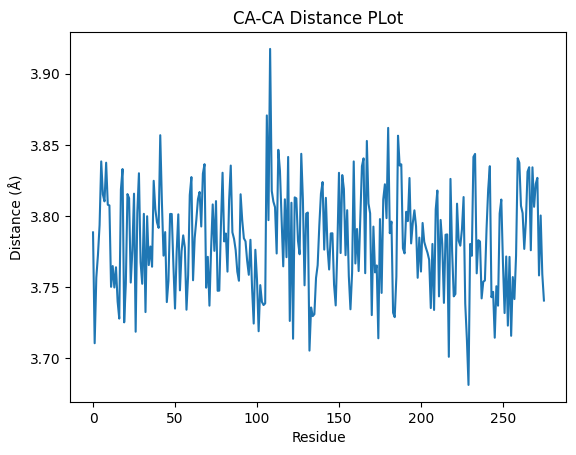

In [ ]:
distances = []
for i in range(len(ca_atoms)-1):
    distances.append(ca_atoms[i] - ca_atoms[i+1])
plt.plot(distances)
plt.title("CA-CA Distance PLot")
plt.xlabel("Residue")
plt.ylabel("Distance (Å)")
plt.show()

In [ ]:
#CA-a Distance Plot
import matplotlib.pyplot as plt


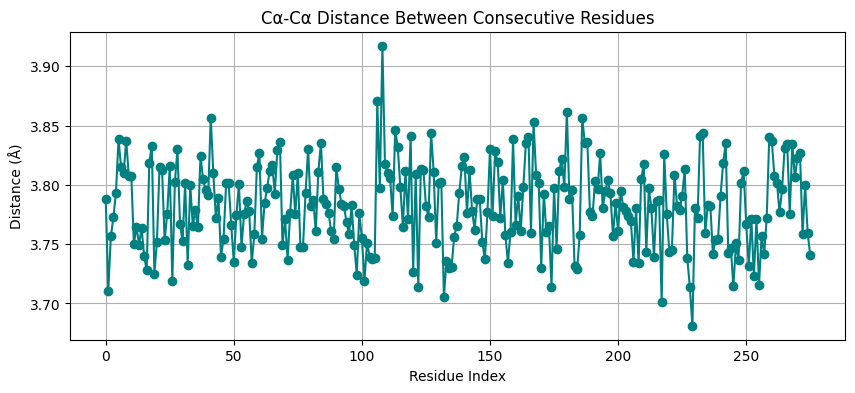

In [ ]:
ca_atoms =[atom for atom in structure.get_atoms() if atom.get_id() ==
"CA"]

distances =[ca_atoms[i] - ca_atoms[i+1] for i in range(len(ca_atoms)-
1)]

plt.figure(figsize=(10, 4))
plt.plot(distances, marker='o', linestyle='-', color='teal')
plt.title("Cα-Cα Distance Between Consecutive Residues")
plt.xlabel("Residue Index")
plt.ylabel("Distance (Å)")
plt.grid(True)
plt.show()

In [ ]:
#Ramchandran Plot (Phi, Psi angles of backbone)
from Bio.PDB.vectors import calc_dihedral
import numpy as np

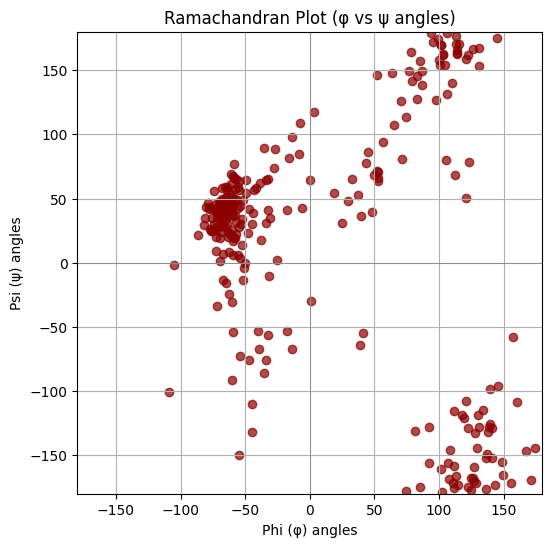

In [ ]:
#Code to Compute DIhedral Angles:
phi_psi = []
for model in structure:
    for chain in model:
        residues = [res for res in chain if is_aa(res)]
        for i in range(1, len(residues)-1):
            try:
                n1 = residues[i-1]['C'].get_vector()
                ca = residues[i]['CA'].get_vector()
                c = residues[i]['C'].get_vector()
                n2 = residues[i+1]['N'].get_vector()

                phi = calc_dihedral(n1, ca, c, n2) * (180.0 / np.pi)

                n = residues[i]['N'].get_vector()
                ca = residues[i]['CA'].get_vector()
                c = residues[i]['C'].get_vector()
                o = residues[i+1]['O'].get_vector()

                psi = calc_dihedral(n, ca, c, o) * (180.0 / np.pi)

                phi_psi.append((phi, psi))

            except KeyError:
                continue

#Ramachandran Plot:
phis, psis = zip(*phi_psi)

plt.figure(figsize=(6, 6))
plt.scatter(phis, psis, alpha=0.7, color='darkred')
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.title("Ramachandran Plot (φ vs ψ angles)")
plt.xlabel("Phi (φ) angles")
plt.ylabel("Psi (ψ) angles")
plt.grid(True)
plt.show()

In [ ]:
#Residue Frequency Bar Chart
from collections import Counter
residue_names = [res.get_resname() for res in structure.get_residues()
if is_aa(res)]
residue_counts = Counter(residue_names)
plt.figure(figsize=(12, 5))
plt.bar(residue_counts.keys(), residue_counts.values(),
color='skyblue')
plt.xticks(rotation=45)
plt.title("Frequency of Amino Acids in Structure")
plt.xlabel("Residue")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

NameError: name 'structure' is not defined

In [ ]:
#backbone Trace Visualization (2D Projection)
x, y, z = [], [], []
for atom in ca_atoms:
    coord = atom.coord
    x.append(coord[0])
    y.append(coord[1])
    z.append(coord[2])

plt.figure(figsize=(10, 4))
plt.plot(x, y, marker='o, linestyle='-', color='navy')
plt.title("2D Projection of Backbone Trace (X vs Y)")
plt.xlabel("X coordinate")
plt.ylabe("Y coordinate")
plt.grid(True)
plt.show()


SyntaxError: unterminated string literal (detected at line 10) (<ipython-input-12-3625446693>, line 10)

In [ ]:
#Hydrophobis Residue Mapping (color coded)
hydrophobic = {"ALA", "VAL", "LEU", "MET", "PHE", "TRP", "PRO"}

hydro_cords = [res['CA'].coord for res in structure.get_residues()
              if is _aa(res) and res.get_resname() in hydrophobid and
'CA' in res]
hydro_x = [coord[0]] for coord in hydro_coords]
hydro_y = [coord[1]] for coord in hydro_coords]

plt.figure(figsize=(8, 5))
plt.scatter(hydro_x, hydro_y, color='goldenrod', aplha=0.8)
plt.title("Hydrophobic Residues in X-Y Plane")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

In [ ]:
#Distance Heatmap Between CA Atoms
from scipy.spatial.distance import pdist, squareform
import seaborn as sns

coors = np.array([atom.coord for atom in ca_atoms])
dist_matrix = squareform(pdist(coords))

plt.figure(figsize=(10, 8))
sns.heatmap(dist_matrix, cmap= 'mako', square=True)
plt.title("Cα-Cα Distance Heatmap")
plt.xlabel("Residue Index")
plt.ylabel("Residue Index")
plt.show()
